<a href="https://colab.research.google.com/github/yelynn99/study-2020-2/blob/master/knn1(sklearn_datasets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
 
# loading the dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
# The mnist features are store under "data", while the labels are under "target"
X, y= mnist["data"], mnist["target"]
X.shape, y.shape


((70000, 784), (70000,))

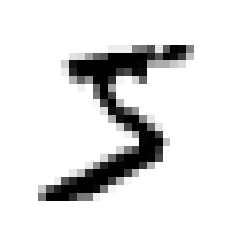

In [ ]:
# lets look at a digit
import matplotlib.pyplot as plt
import matplotlib as mpl
 
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
# the labels are string, we need to convert them into number
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
forest_clf = KNeighborsClassifier(n_neighbors=42) #knn으로 바꿈
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
# Cross-Validation on RandomForestClassifier
# measuring models performance(cross-validation scores (이거랑 confusion matrix) 두 개가 모델 정확성 측정하는 것임)
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')


array([0.94575, 0.9456 , 0.948  ])

In [ ]:
from sklearn.metrics import accuracy_score
y_test_pred = forest_clf.predict(X_test)
print(y_test_pred)
accuracy_score(y_test, y_test_pred)


[7 2 1 ... 4 5 6]


0.9564